In [6]:
import pandas as pd

In [7]:
product = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/20220304/data.csv")
product.head()

Species  Weight  Length  Diagonal   Height   Width
0       A   242.0    25.4      30.0  11.5200  4.0200
1       A   290.0    26.3      31.2  12.4800  4.3056
2       A   340.0    26.5      31.1  12.3778  4.6961
3       A   363.0    29.0      33.5  12.7300  4.4555
4       A   430.0    29.0      34.0  12.4440  5.1340

## 사이킷런 계열의 데이터 타입은 np.array

In [8]:
type(product['Species'])

pandas.core.series.Series

In [9]:
product_y = product['Species'].to_numpy()

In [10]:
# 특정 행(렬)만 가져오기 --> 슬라이스 혹은 iloc 이용
product_x = product.iloc[:,1:].to_numpy() # 넘파이 배열로 변환

# '+02' : 콤마를 뒤로 두개 보낸 것 (242 = 2.42)

In [11]:
product_x[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

## k-최근접 이웃의 다중 분류

In [12]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(product_x, product_y, random_state=42) # x : 학습용 / y : 검증용

train_x.shape, test_x.shape, train_y.shape, test_y.shape # 항상 차수를 확인해 주어야 함 (column 개수)

((119, 5), (40, 5), (119,), (40,))

### 다중분류는 서로 다른 그룹에 대한 분류 작업...(표준화 작업)

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_x)
train_scaled = ss.transform(train_x)
test_scaled = ss.transform(test_x)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_y)
kn.score(train_scaled, train_y), kn.score(test_scaled, test_y) # 학습된 데이터 / 검증용 데이터(학습하지 않은 데이터와 정답(test_y))

(0.8823529411764706, 0.85)

In [16]:
kn.classes_ # 분류 형태

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [17]:
predict = kn.predict(test_scaled)
predict[:5], test_y[:5] # 예측값과 정답의 적중률 확인
# 적중률이 평균 이상이라는 것을 알 수 있음

(array(['E', 'G', 'F', 'E', 'E'], dtype=object),
 array(['E', 'G', 'F', 'C', 'E'], dtype=object))

In [18]:
# scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수가 두 개 --> decision_function & predict_proba
# predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려줌
# predict 함수는 새로운 속성들을 넣었을 때 그 클래스에 속하는지 속하지 않는지를 나타내는 1 또는 0으로 구성된 벡터를 반환해줌

proba = kn.predict_proba(test_scaled[:5])
proba # 4번째 인덱스에서 E가 될 확률이 가장 높으므로 분류 모델로서 E가 적합

array([[0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.66666667,
        0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.66666667,
        0.        , 0.        ]])

# Logistic Regression (로지스틱 회귀)

### 로지스틱 회귀 --> 예측 X, 분류 O
### 확률을 0~1 사이의 값으로 예측
### 더 높은 값으로 분류
### 이진분류에 적합...(0,1로 분류)
### 남자 여자 / 합격, 불합격 / 양품, 불량 / 맞다, 틀리다 / 사망, 생존 등등...

In [19]:
import numpy as np
import matplotlib.pyplot as plt

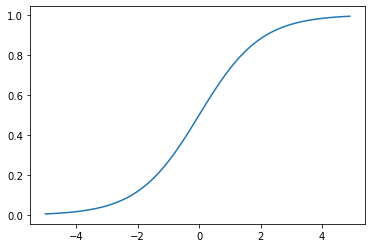

In [20]:
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()
# 전형적인 로지스틱 회귀 형태

In [21]:
np.unique(product_y, return_counts=True) # numpy 형태로 결과값 보기
# np.bincount(product_y) --> 타입 불일치 (bin은 숫자를 세주지만 product_y는 문자형태로 되어 있음)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array([35, 20,  6, 11, 56, 17, 14], dtype=int64))

In [22]:
pd.value_counts(product_y) # DataFrame 형태로 결과값 보기

E    56
A    35
B    20
F    17
G    14
D    11
C     6
dtype: int64

In [23]:
# 이진분류 수행하기
# product type : E or A 데이터만 추출
a = np.array(['A','B','C','D','E'])
a == 'B' # array([False,  True, False, False, False])
a[a == 'B'] # array(['B'], dtype='<U1') --> True에 해당하는 것만 출력된 것

array(['B'], dtype='<U1')

In [24]:
train_y.shape, train_x.shape

((119,), (119, 5))

In [25]:
E_A_idx = (train_y =='E') | (train_y == 'A')
train_E_A_x = train_x[E_A_idx] # x와 y와 데이터 차수가 동일하고 데이터 순서 역시 바꾼 적이 없기 때문에
                               # y에 적용된 값이 x에도 적용이 가능
train_E_A_y = train_y[E_A_idx]
train_E_A_x.shape, train_E_A_y.shape
# 분류한 데이터, E 또는 Y인 데이터는 68개인 것을 알 수 있음

((68, 5), (68,))

In [26]:
# 아예 데이터프레임인 상태에서 분류해도 됨
# 다만 현재 작업은 sklearn으로 데이터를 추출했으나, 순서를 뒤바꾼 적이 없기 때문에 이 또한 가능한 것임

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_E_A_x, train_E_A_y)

LogisticRegression(max_iter=1000)

In [29]:
lr.predict(train_E_A_x[:5]) # 분류모델

array(['A', 'E', 'E', 'A', 'E'], dtype=object)

In [30]:
lr.predict_proba(train_E_A_x[:5]) # 이진분류에 적합 (0~1 사이의 값 내에서 예측)

array([[0.99567277, 0.00432723],
       [0.00262134, 0.99737866],
       [0.00346347, 0.99653653],
       [0.9946915 , 0.0053085 ],
       [0.00771321, 0.99228679]])

In [31]:
lr.classes_ # A와 E로 분류된 후의 확률임을 보여줌

array(['A', 'E'], dtype=object)

In [32]:
print(lr.coef_) # 가중치
print(lr.intercept_) # 절편, bias
# 두 제품에 대해 판단을 하기 위해 적용한 함수는 5차원 형식

[[ 0.01150067  0.50721392 -0.5434279  -1.47650461  0.14690539]]
[13.85533138]


### 실제로 선형 회귀와 linear는 잘 안 쓰고, K-최근접이나 로지스틱 회귀를 주로 사용함
### 특히 이진분류를 할 때에는 로지스틱 회귀 사용 권장 ! --> 가장 효율적
### ***그러나 다중 분류도 수행

In [33]:
lr = LogisticRegression(max_iter=10000) # 10000번 반복 수행
lr.fit(train_scaled, train_y)

LogisticRegression(max_iter=10000)

In [34]:
lr.predict(train_scaled), lr.predict(test_scaled)

(array(['A', 'F', 'G', 'E', 'D', 'E', 'E', 'A', 'E', 'E', 'E', 'A', 'E',
        'D', 'E', 'A', 'G', 'E', 'E', 'A', 'F', 'A', 'F', 'E', 'D', 'A',
        'E', 'F', 'A', 'E', 'D', 'E', 'E', 'A', 'B', 'E', 'A', 'A', 'E',
        'E', 'E', 'F', 'E', 'G', 'F', 'E', 'E', 'D', 'G', 'A', 'E', 'G',
        'E', 'D', 'G', 'E', 'E', 'E', 'A', 'E', 'E', 'E', 'E', 'E', 'E',
        'A', 'E', 'A', 'E', 'A', 'E', 'E', 'E', 'E', 'F', 'F', 'E', 'A',
        'E', 'A', 'E', 'F', 'A', 'A', 'E', 'G', 'F', 'A', 'F', 'D', 'E',
        'E', 'E', 'G', 'E', 'E', 'E', 'A', 'E', 'G', 'F', 'E', 'G', 'A',
        'E', 'F', 'E', 'E', 'E', 'E', 'E', 'E', 'G', 'A', 'A', 'E', 'A',
        'E', 'E'], dtype=object),
 array(['E', 'G', 'F', 'E', 'E', 'A', 'G', 'E', 'E', 'F', 'A', 'E', 'A',
        'D', 'A', 'A', 'E', 'E', 'E', 'A', 'G', 'A', 'A', 'A', 'A', 'E',
        'E', 'E', 'G', 'G', 'F', 'E', 'E', 'F', 'A', 'E', 'E', 'E', 'D',
        'E'], dtype=object))

In [35]:
# 회귀 -  확률(%)
# 다중분류 시 분류에 다른 확률을 알고 싶을 때 --> .proba

In [36]:
lr.score(train_scaled, train_y), lr.score(test_scaled, test_y)

(0.8067226890756303, 0.85)

In [37]:
lr.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [38]:
lr.coef_.shape

(7, 5)

In [40]:
np.round(lr.coef_, 1), lr.intercept_

(array([[-0.1, -0.1,  0.6,  2.8, -0.3],
        [-0.8, -0.5,  0.4, -0.4,  0.6],
        [ 0.3,  0. ,  0.1,  0.2,  1.1],
        [-0.3, -0.8, -0.8,  1.9, -0.9],
        [ 1.3,  0.3, -1.3, -1.7,  1.6],
        [ 0. ,  1.7,  1.8, -1.3, -0.6],
        [-0.4, -0.6, -0.7, -1.5, -1.5]]),
 array([ 0.38862776,  1.15910169, -0.10802126, -0.11439729,  2.40795555,
         0.04859162, -3.78185807]))

In [43]:
lr.decision_function(train_scaled[:1])

array([[ 5.61774957,  0.2227917 ,  1.61504147,  1.09554014,  1.20392085,
        -0.49091354, -9.26413018]])